# Flash LiDAR Point Cloud Classification

# Unsupervised Learning - Clustering

## Processing of the IFM Data



# Data Exploration

In [32]:
from IPython.display import display # Allows the use of display() for DataFrames
import processPly as pc
import time
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

#load in the point cloud file and process it for features.
file_path = "/media/sroth/adata/gallo/dowelData/dowelData/stationary/"
file_path = "d:/gallo/dowelData/dowelData/stationary/"
file_name = file_path + "1488374215.674862.flt5.ply"
tstart = time.time()
data = pc.calculate_point_cloud_features(file_name, pca_min_radius=0.06)
print ("execution time = ", time.time() - tstart)

# Remove the point cloud x,y,z data from the data frame. Those will not be used as features
point_cloud_points = data[['x','y','z','intensity']]
del data['x']
del data['y']
del data['z']
del data['intensity']


# The skew and kurtosis numbers aren't needed.
#del data['skewDist']
#del data['kurtDist']
#del data['skewIntensity']
#del data['kurtIntensity']

display(data.describe())

('execution time = ', 57.07699990272522)


,sxx,sxy,sxz,syy,syz,szz,eigVal1,eigVal2,eigVal3,maxDist,meanDist,varDist
count,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000,2.294600e+04,2.294600e+04,22946.000000,22946.000000,22946.000000,22946.000000,22946.000000
mean,0.000606,0.000233,-0.000072,0.001027,0.000005,7.679095e-04,1.500044e-04,0.000776,0.001475,0.060419,0.039645,0.000233
std,0.000556,0.000452,0.000187,0.000425,0.000161,4.342831e-04,1.619001e-04,0.000415,0.000584,0.009795,0.007777,0.000178
min,0.000031,-0.002367,-0.003010,0.000070,-0.003013,4.852920e-07,2.736317e-08,0.000004,0.000162,0.022000,0.013222,0.000030
25%,0.000344,0.000006,-0.000146,0.000860,-0.000043,4.315111e-04,6.338073e-05,0.000493,0.001229,0.059000,0.036830,0.000181
50%,0.000481,0.000371,-0.000064,0.001123,0.000009,8.032089e-04,1.046518e-04,0.000772,0.001438,0.059000,0.038866,0.000200
75%,0.000671,0.000586,0.000003,0.001201,0.000064,1.107156e-03,1.831855e-04,0.001034,0.001590,0.060000,0.040750,0.000224
max,0.008245,0.004383,0.004382,0.009161,0.003210,7.475256e-03,3.319083e-03,0.007141,0.011101,0.190263,0.156593,0.003200



## Points of Interest:

Using CloudCompare to visualize the point cloud, I've chosen 4 points each of canes and cordons (2 from the top and bottom cordon). Looking at the feature values, it seems that the eigen values will most likely discriminate between the canes and cordons.

### Cane - skinny shoots coming off cordon

### Cordon - core vine



In [33]:
sample_indices = [5026, 8152, 12985, 16106, 17824, 21482, 19633, 10908, 17905]
sample_labels = ["Dowel 2in", "Dowel 1.25in", "Dowel 1.0", "Dowel 0.75in", "Dowel 0.5", "Dowel 0.25in", "Lamp", "Back Wall", "Side Wall"]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[sample_indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of canes:"

display(samples)



Chosen samples of canes:


,sxx,sxy,sxz,syy,syz,szz,eigVal1,eigVal2,eigVal3,maxDist,meanDist,varDist
0,0.000164,0.000036,-0.000020,0.000906,-0.000013,0.000145,0.000132,0.000175,0.000908,0.051,0.029715,0.000193
1,0.000283,0.000100,-0.000079,0.001154,-0.000087,0.000397,0.000240,0.000417,0.001177,0.060,0.035362,0.000293
2,0.000051,0.000096,-0.000003,0.001243,-0.000006,0.000029,0.000029,0.000044,0.001250,0.060,0.031456,0.000269
3,0.000063,0.000108,-0.000133,0.001178,0.000006,0.000525,0.000018,0.000560,0.001188,0.059,0.036378,0.000299
4,0.000317,0.000170,-0.000408,0.001182,-0.000120,0.000800,0.000077,0.000907,0.001315,0.060,0.046178,0.000178
5,0.000265,-0.000151,-0.000137,0.001047,0.000106,0.000073,0.000001,0.000292,0.001092,0.059,0.034676,0.000261
6,0.000294,-0.000121,0.000018,0.000070,-0.000009,0.001161,0.000017,0.000347,0.001162,0.057,0.040774,0.000178
7,0.000365,0.000617,0.000064,0.001136,0.000077,0.001055,0.000023,0.001034,0.001499,0.057,0.038335,0.000182
8,0.000966,-0.000459,0.000103,0.000416,-0.000081,0.000240,0.000150,0.000228,0.001243,0.060,0.044234,0.000153


## Visualize Feature Distributions


,sxx,sxy,sxz,syy,syz,szz,eigVal1,eigVal2,eigVal3,maxDist,meanDist,varDist
sxx,1.000000,-0.205952,-0.144913,0.266013,-0.050485,0.223022,0.423572,0.500150,0.838948,0.816067,0.776250,0.780005
sxy,-0.205952,1.000000,-0.058980,0.341536,0.028637,0.071250,-0.095429,0.080682,0.074809,-0.018024,-0.003609,-0.028456
sxz,-0.144913,-0.058980,1.000000,-0.177416,-0.019375,0.084034,0.051408,-0.097773,-0.149451,-0.138965,-0.102983,-0.134328
syy,0.266013,0.341536,-0.177416,1.000000,0.074055,0.035092,0.274845,0.467645,0.599173,0.478405,0.474768,0.444530
syz,-0.050485,0.028637,-0.019375,0.074055,1.000000,-0.046374,-0.046017,-0.007608,-0.010466,-0.021686,-0.008858,-0.022360
szz,0.223022,0.071250,0.084034,0.035092,-0.046374,1.000000,0.339286,0.760386,0.347456,0.280584,0.461377,0.171981
eigVal1,0.423572,-0.095429,0.051408,0.274845,-0.046017,0.339286,1.000000,0.365704,0.318648,0.437925,0.549090,0.376443
eigVal2,0.500150,0.080682,-0.097773,0.467645,-0.007608,0.760386,0.365704,1.000000,0.570458,0.517364,0.664761,0.403577
eigVal3,0.838948,0.074809,-0.149451,0.599173,-0.010466,0.347456,0.318648,0.570458,1.000000,0.845127,0.803484,0.803236
maxDist,0.816067,-0.018024,-0.138965,0.478405,-0.021686,0.280584,0.437925,0.517364,0.845127,1.000000,0.886903,0.939666


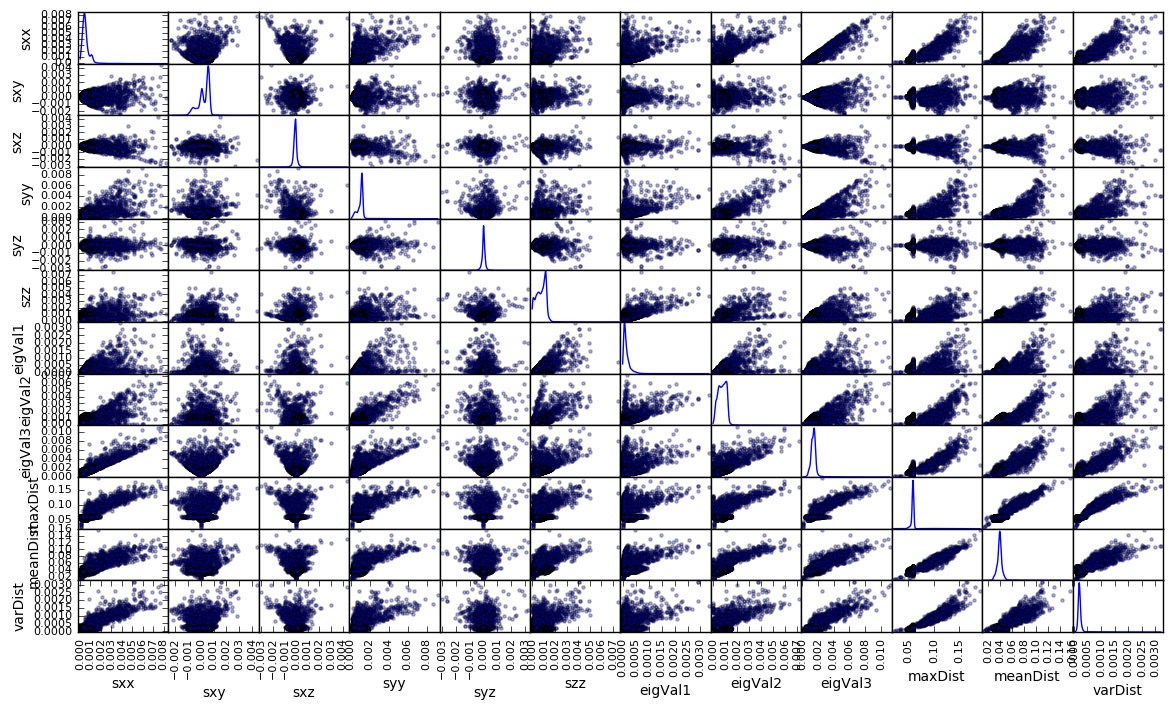

In [34]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.corr()


## Data Preprocessing
In this section, we will preprocess the data to create a better representation of vine parts by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from the analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


offset =  [0, 0.0047344590122351538, 0.0060196584302711215, 0, 0.006025770562310735, 0, 0, 0, 0, 0, 0, 0]


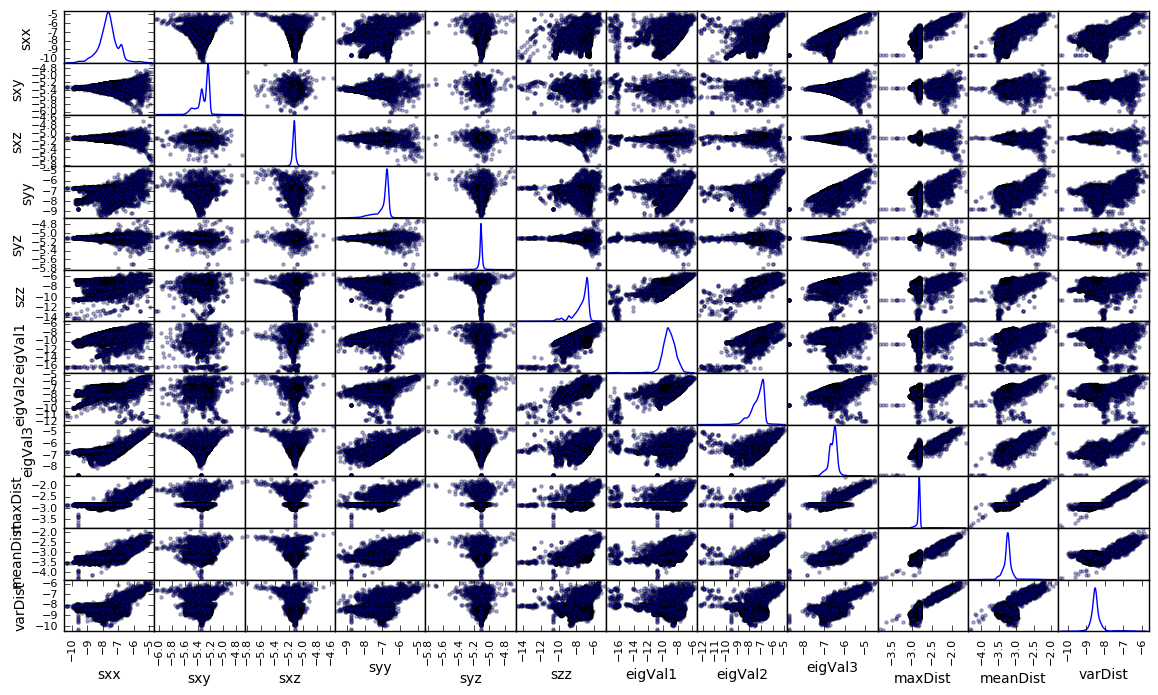

In [35]:
def calculate_offset(data):
    # To ensure all values are positive, add a constant offset to any
    # column that has a negative minimum value
    
    # Find the minimum value for all columns
    min_value = data.min(axis=0)
    # if the minimum value is negative, all values in that column must be offset by abs(min)
    # Otherwise, the offset is 0
    offset = [-2*val if val < 0 else 0 for val in min_value]
    print 'offset = ', offset
    return offset

# To ensure there are no negative data values, offset all columns with negative numbers
offset = calculate_offset(data)
# Scale the data using the natural logarithm
log_data = np.log(data+offset)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples+offset)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [36]:
# Display the log-transformed sample data
print('Samples')
display(log_samples)


Samples


,sxx,sxy,sxz,syy,syz,szz,eigVal1,eigVal2,eigVal3,maxDist,meanDist,varDist
0,-8.715707,-5.345313,-5.116047,-7.006764,-5.113794,-8.840893,-8.932193,-8.652822,-7.004579,-2.975930,-3.516103,-8.551214
1,-8.171115,-5.332068,-5.125879,-6.764402,-5.126309,-7.832262,-8.336163,-7.783119,-6.744645,-2.813411,-3.342119,-8.135725
2,-9.886492,-5.332902,-5.113297,-6.690386,-5.112646,-10.432512,-10.454683,-10.034514,-6.684255,-2.813411,-3.459156,-8.220524
3,-9.671436,-5.330340,-5.135132,-6.744180,-5.110733,-7.551697,-10.943820,-7.487260,-6.735359,-2.830218,-3.313803,-8.114032
4,-8.057411,-5.317559,-5.182910,-6.740439,-5.131899,-7.130343,-9.471836,-7.004995,-6.633926,-2.813411,-3.075253,-8.633282
5,-8.237175,-5.385289,-5.135758,-6.862092,-5.094236,-9.519145,-13.561186,-8.139038,-6.820131,-2.830218,-3.361717,-8.251830
6,-8.130805,-5.378789,-5.109798,-9.564745,-5.113198,-6.758314,-10.966647,-7.966930,-6.757901,-2.864704,-3.199706,-8.631218
7,-7.916401,-5.230475,-5.102210,-6.780022,-5.099031,-6.854115,-10.685076,-6.874544,-6.502681,-2.864704,-3.261392,-8.610881
8,-6.941921,-5.454916,-5.095814,-7.785829,-5.125291,-8.336874,-8.804665,-8.384766,-6.690096,-2.813412,-3.118261,-8.783593


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [37]:
# For each feature find the data points with extreme high or low values
from collections import defaultdict
index_outlier_count = defaultdict(int)

for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
#     print "Data points considered outliers for the feature '{}':".format(feature)
#     display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
   
    # Calculate if a data point is an outlier for this feature
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for index in outlier_data.index.values:
        index_outlier_count[index] += 1


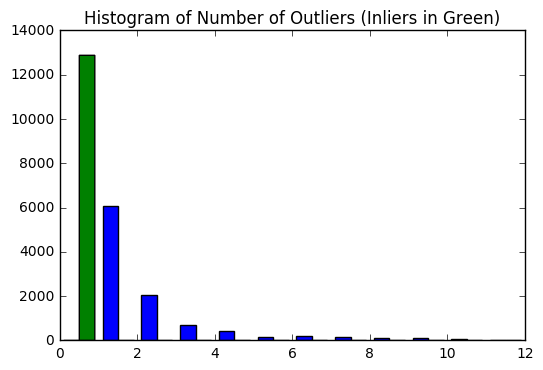

In [38]:
# Histogram the number of outliers
outlier_count = np.array([index_outlier_count[index] for index in index_outlier_count])
# Find the number of points that are not inliers
number_inliers = log_data.shape[0] - len(outlier_count)

min_val = 0
max_val = int(max(outlier_count))

[n, bins, patches] = plt.hist([outlier_count, np.zeros(number_inliers)], bins=range(min_val, max_val+1), color=['b','g'])

plt.title('Histogram of Number of Outliers (Inliers in Green)')

In [39]:
   
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
# Find outliers from more than category
for index in index_outlier_count:
    if index_outlier_count[index] > 1:
        outliers.append(index)
        # Remove from log_samples if necessary
        if index in sample_indices: 
            print 'have to remove ', index, ' from sample samples'

# print 'Outliers in more than 1 data set are: ', outliers

# There is not an obvious reason to remove any of these data points.
# outliers = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

have to remove  5026  from sample samples
have to remove  12985  from sample samples
have to remove  19633  from sample samples
have to remove  21482  from sample samples


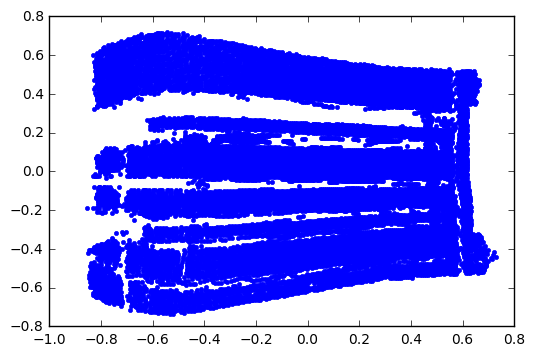

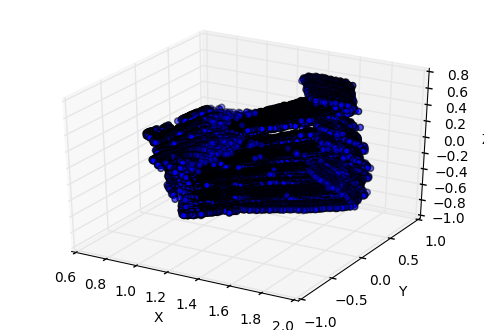

In [40]:
from mpl_toolkits.mplot3d import Axes3D

good_point_cloud = point_cloud_points.drop(log_data.index[outliers]).reset_index(drop = True)

plt.plot(-good_point_cloud['y'], good_point_cloud['z'], 'b.')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(good_point_cloud['x'], good_point_cloud['y'], good_point_cloud['z'], 'b.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA Explained Variances Cumulative Sum
Dimension 1     0.4495
Dimension 2     0.7538
Dimension 3     0.8786
Dimension 4     0.9546
Dimension 5     0.9762
Dimension 6     0.9911
Dimension 7     0.9952
Dimension 8     0.9976
Dimension 9     0.9994
Dimension 10    0.9996
Dimension 11    0.9998
Dimension 12    1.0000
Name: Explained Variance, dtype: float64


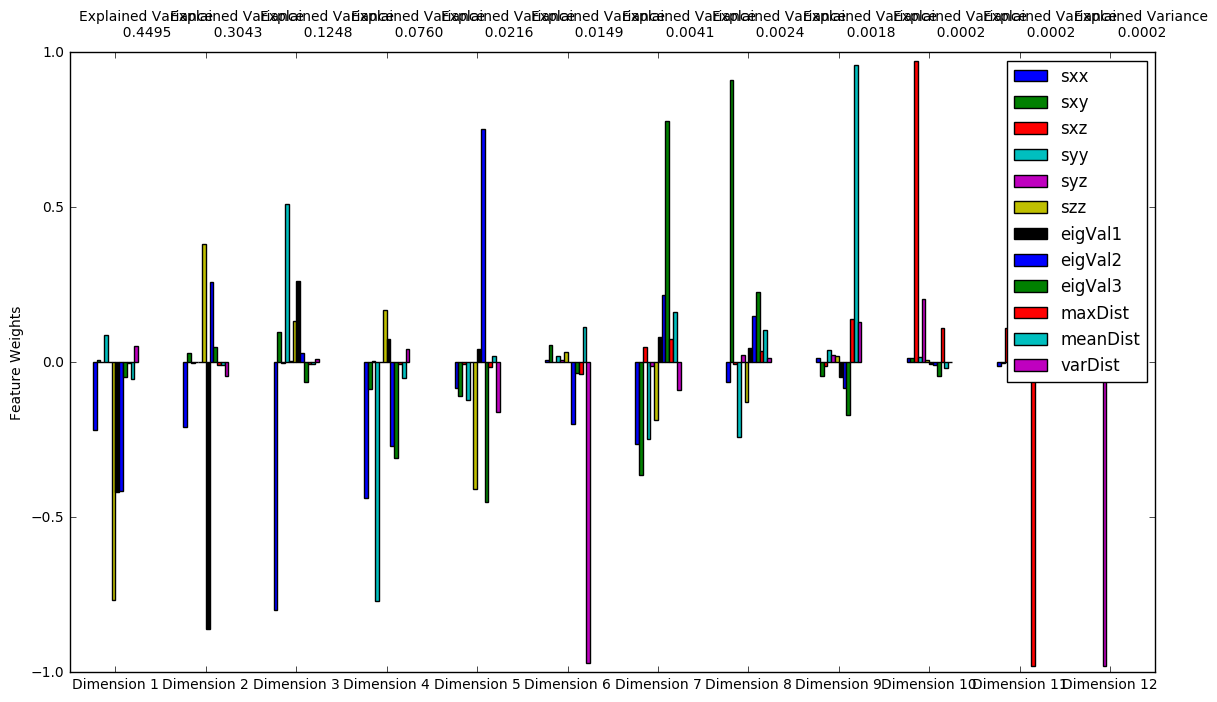

In [41]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
import visuals as vs
pca = PCA()
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print 'PCA Explained Variances Cumulative Sum'
print pca_results['Explained Variance'].cumsum()

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [42]:
# TODO: Apply PCA by fitting the good data with only four dimensions
pca = PCA(n_components=4)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

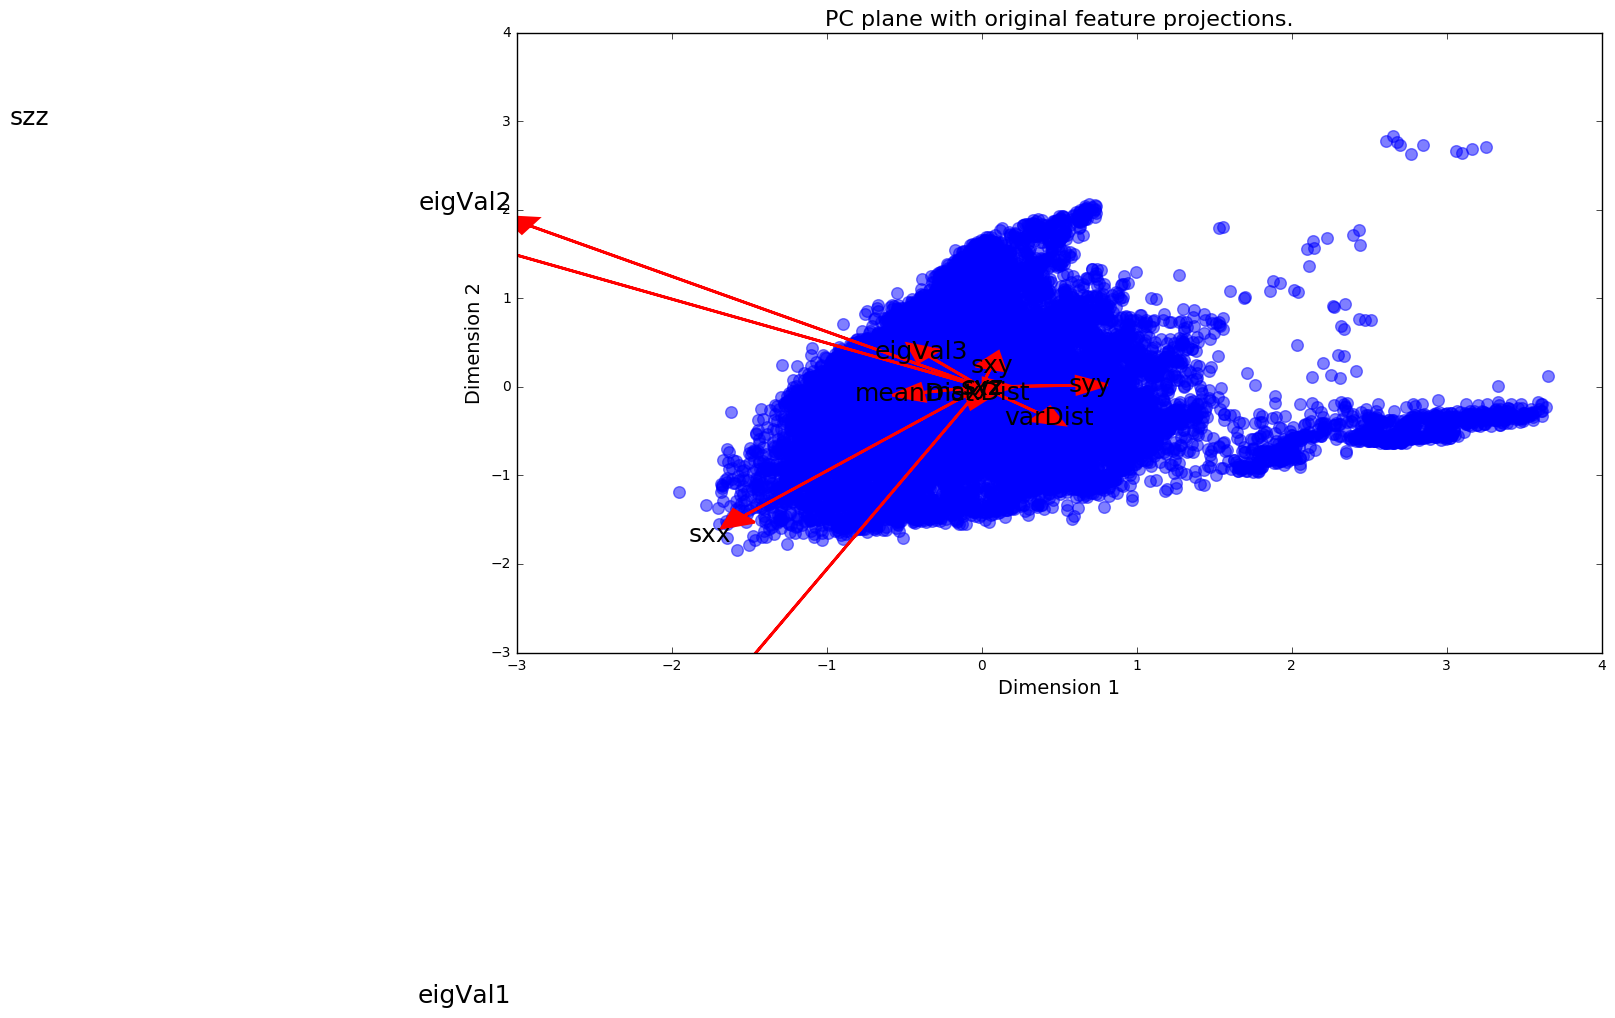

In [43]:
# Create a biplot
vs.biplot(good_data, reduced_data[['Dimension 1', 'Dimension 2']], pca)


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

Silhouette Score for  2  clusters is  0.147393341099
Silhouette Score for  3  clusters is  0.0801344861791
Silhouette Score for  4  clusters is  0.167848896349
Silhouette Score for  5  clusters is  0.184095318633
Silhouette Score for  6  clusters is  0.160805206539
Silhouette Score for  7  clusters is  0.173827201311
Silhouette Score for  8  clusters is  0.154614610473
Silhouette Score for  9  clusters is  0.163001968578


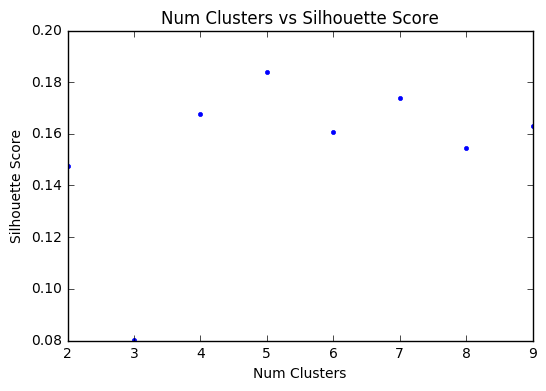

In [44]:
from sklearn import mixture


cluster_scores = defaultdict(float)
num_clusters = range(2,10)
for n_clusters in num_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = mixture.GMM(n_components=n_clusters, covariance_type='full', random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)

    print 'Silhouette Score for ', n_clusters, ' clusters is ', score
    cluster_scores[n_clusters] = score

plt.figure()
plt.plot(cluster_scores.keys(), cluster_scores.values(), 'b.')
plt.xlabel('Num Clusters')
plt.ylabel('Silhouette Score')
plt.title('Num Clusters vs Silhouette Score')



In [51]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GMM(n_components=5, covariance_type='full', random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
# Use the mahalanobis distance as a metric because it takes into consideration the points distributions of the clusters.
# This is more appropriate for the GMM (but doesn't seem to make any difference)
score = silhouette_score(reduced_data, preds, metric='mahalanobis')


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [52]:
# import matplotlib.cm as cm
# def cluster_results(reduced_data, preds, centers, pca_samples):
# 	'''
# 	Visualizes the PCA-reduced cluster data in two dimensions
# 	Adds cues for cluster centers and student-selected sample data
# 	'''

# 	predictions = pd.DataFrame(preds, columns = ['Cluster'])
# 	plot_data = pd.concat([predictions, reduced_data], axis = 1)

# 	# Generate the cluster plot
# 	fig, ax = plt.subplots(figsize = (14,8))

# 	# Color map
# 	cmap = cm.get_cmap('gist_rainbow')

# 	# Color the points based on assigned cluster
# 	for i, cluster in plot_data.groupby('Cluster'):   
# 	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
# 	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

# 	# Plot centers with indicators
# 	for i, c in enumerate(centers):
# 	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
# 	               alpha = 1, linewidth = 2, marker = 'o', s=200);
# 	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

# 	# Plot transformed sample points 
# 	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
# 	           s = 150, linewidth = 4, color = 'black', marker = 'x');

# 	# Set plot title
# 	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


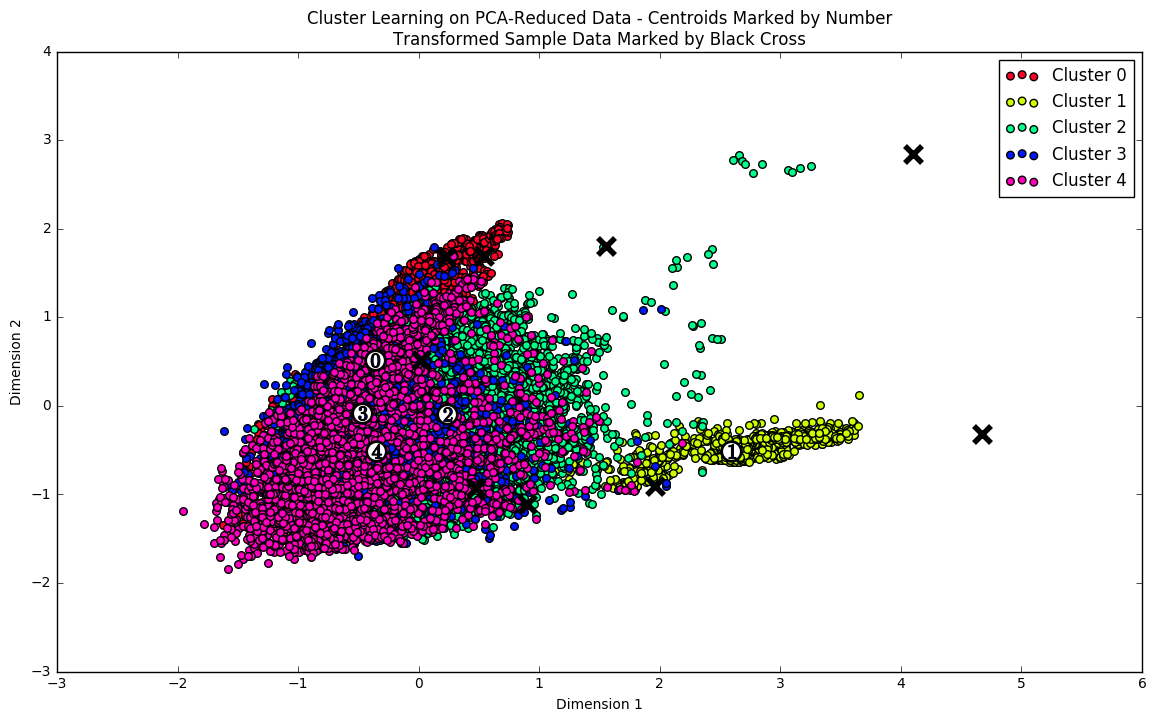

In [53]:
import visuals as vs
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [54]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print ('Centers of the Clusters')
display(true_centers)

# Calculate the percentile of the segment 0 and segment 1 data
percentile = data.append(true_centers)
percentile = percentile.rank(pct=True)
percentile = percentile.round(decimals=3)*100
print ('Percentile of the 2 Segments')
display(percentile.iloc[[-4,-3,-2,-1]])

Centers of the Clusters


,sxx,sxy,sxz,syy,syz,szz,eigVal1,eigVal2,eigVal3,maxDist,meanDist,varDist
Segment 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Percentile of the 2 Segments


,sxx,sxy,sxz,syy,syz,szz,eigVal1,eigVal2,eigVal3,maxDist,meanDist,varDist
Segment 1,0.0,24.6,74.2,0.0,44.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 2,0.0,24.6,74.2,0.0,44.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 3,0.0,24.6,74.2,0.0,44.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 4,0.0,24.6,74.2,0.0,44.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Display the predictions
print('Sample Predictions')
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster ", pred, ". Hand label = ", sample_labels[i]
    


Sample Predictions
Sample point 0 predicted to be in Cluster  1 . Hand label =  Dowel 2in
Sample point 1 predicted to be in Cluster  2 . Hand label =  Dowel 1.25in
Sample point 2 predicted to be in Cluster  1 . Hand label =  Dowel 1.0
Sample point 3 predicted to be in Cluster  2 . Hand label =  Dowel 0.75in
Sample point 4 predicted to be in Cluster  2 . Hand label =  Dowel 0.5
Sample point 5 predicted to be in Cluster  2 . Hand label =  Dowel 0.25in
Sample point 6 predicted to be in Cluster  3 . Hand label =  Lamp
Sample point 7 predicted to be in Cluster  0 . Hand label =  Back Wall
Sample point 8 predicted to be in Cluster  3 . Hand label =  Side Wall


In [56]:
import processPly as ply

point_cloud_classified = pd.DataFrame(good_point_cloud[['x','y','z']])

point_cloud_classified['cluster'] = pd.Series(preds, index=good_point_cloud.index)
# del point_cloud_classified['intensity']
file_name = file_path + "classified.ply"
out_file = file(file_name, 'w')
ply.write_poly_file2(out_file, np.array(point_cloud_classified))
out_file.close()